In [1]:
import numpy as np

# FORWARD PROPAGATION ALGORITHM

<img src="image/forward_propagation_1.png">

<img src="image/forward_propagation_2.png">

<img src="image/forward_propagation_3.png">

<img src="image/forward_propagation_4.png">

<img src="image/forward_propagation_5.png">

In [9]:
input_data = [
    np.array([3,5]),
    np.array([1,-1]),
    np.array([0,0]),
    np.array([8,4])
]

In [10]:
input_data

[array([3, 5]), array([ 1, -1]), array([0, 0]), array([8, 4])]

In [11]:
weights = {
    'node_0': np.array([2,4]),
    'node_1': np.array([4,-5]),
    'output': np.array([2,7])
}

In [12]:
weights

{'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}

<img src="image/RELU1.png">

<img src="image/RELU2.png">

In [2]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

In [3]:
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [18]:
# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


# HOW WEIGHT CHANGES AFFECT ACCURACY

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
input_data = [
    np.array([0,3]),
    np.array([1,2]),
    np.array([-1,-2]),
    np.array([4,0])
]

In [23]:
weights_0 = {
    'node_0': np.array([2,1]),
    'node_1': np.array([1,2]),
    'output': np.array([1,1])
}

weights_1 = {
    'node_0': np.array([2,1]),
    'node_1': np.array([1.,1.5]),
    'output': np.array([1.,1.5])
}
target_actuals = [1,3,5,7]

In [24]:
# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


# Optimizing a neural network

## calculate slopes and update weights

<img src="image/gradient_descent_1.png">

<img src="image/gradient_descent_2.png">

In [25]:
import numpy as np 

In [26]:
weights = np.array([1, 2])

In [27]:
input_data = np.array([3, 4])

In [28]:
target = 6

In [29]:
learning_rate = 0.01

In [30]:
preds = (weights * input_data).sum() 

In [31]:
error = preds - target

In [32]:
error

5

In [33]:
gradient = 2 * input_data * error 

In [34]:
gradient

array([30, 40])

In [35]:
weights_updated = weights - learning_rate * gradient 

In [36]:
preds_updated = (weights_updated * input_data).sum()

In [37]:
error_updated = preds_updated - target

In [38]:
error_updated

2.5

## Making multiple updates to weights

In [87]:
def get_slope(input_data, target, weights):
    preds = (input_data * weights).sum()
    error = preds - target
    slope = 2 * input_data * error
    return slope

In [88]:
get_slope(input_data, target, weights)

array([14, 28, 42])

In [107]:
def get_mse(input_data, target, weights):
    preds = (input_data * weights).sum()
    error = (preds - target) ** 2 / 1
    return error

In [45]:
import matplotlib.pyplot as plt

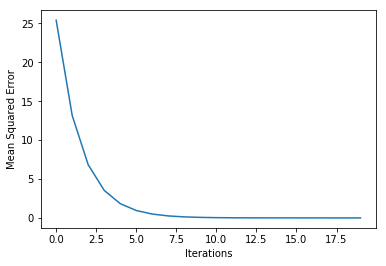

In [116]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0
n_updates = 100
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
#     print('slope = %s', slope)
    # Update the weights: weights
    weights = weights - 0.01 * slope
#     print('weights = %s', weights)
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
#     print('mse = %s', mse)
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(se_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()